# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [136]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [137]:
websites = pd.read_csv('../website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [138]:
# What the dataset looks like?
websites.info()
# El dataframe tiene 1871 filas y 21 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [139]:
# What are the data types?
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [140]:
# Columnas con valores nulos
missing_counts = websites.isnull().sum()
missing_counts

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [141]:
websites.CHARSET.value_counts()

CHARSET
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

In [142]:
websites.SERVER.value_counts()

SERVER
Apache                                                       386
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64

In [143]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
BS                   4
ru                   4
AT                   4
HK                   3
us                   3
TR                   3
BE                   3
DE                   3
SC                   3
KY                   3
SE                   3
BR                   2
UY                   2
Cyprus               2
SI                   2
UA                   2
RU                   2
IL                   2
NO                   2
KG                   2
TH                   1
se                   1
LV                   1
LU                   1
United Kingdom       1
UG                  

In [144]:
websites.WHOIS_STATEPRO.value_counts()

WHOIS_STATEPRO
CA           372
NY            75
WA            65
Barcelona     62
FL            61
            ... 
Alicante       1
SK             1
TR             1
RIX            1
Paris          1
Name: count, Length: 181, dtype: int64

In [145]:
websites.WHOIS_REGDATE.value_counts()

WHOIS_REGDATE
17/09/2008 0:00    62
13/01/2001 0:12    59
31/07/2000 0:00    47
15/02/2005 0:00    41
29/03/1997 0:00    33
                   ..
23/11/1994 0:00     1
30/08/2015 0:00     1
30/04/2009 0:00     1
27/11/2006 0:00     1
14/11/2008 0:00     1
Name: count, Length: 890, dtype: int64

In [146]:
websites.WHOIS_UPDATED_DATE.value_counts()

WHOIS_UPDATED_DATE
2/09/2016 0:00      64
12/12/2015 10:16    59
29/06/2016 0:00     47
14/01/2017 0:00     42
29/11/2016 0:00     36
                    ..
5/05/2013 3:46       1
21/07/2016 18:54     1
5/09/2016 3:47       1
19/04/2017 17:24     1
9/12/2016 0:00       1
Name: count, Length: 593, dtype: int64

In [147]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [148]:
# Which columns contain the features of the websites?
# All columns except 'Type', which is the one we want to predict.

In [149]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
# We want to predict 'Type': 0 for benign, 1 for malicious.

In [150]:
# 0 for bening 1 for maliciuos websites

In [151]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
# Columns we should transform: CHARSET, SERVER, WHOIS_COUNTRY, WHOIS_STATEPRO. 
# But maybe not to 'ordinal' values per se; just 'categorical' encoding, that is, encode them as numbers.
#  (E.g. there is no ordinality or hierarchy in a server being Windows and another being Apache)

#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

In [152]:
# Your code here
numericals = websites.select_dtypes(np.number)
numericals.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [153]:
corr = numericals.corr()
display(corr)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


<Axes: >

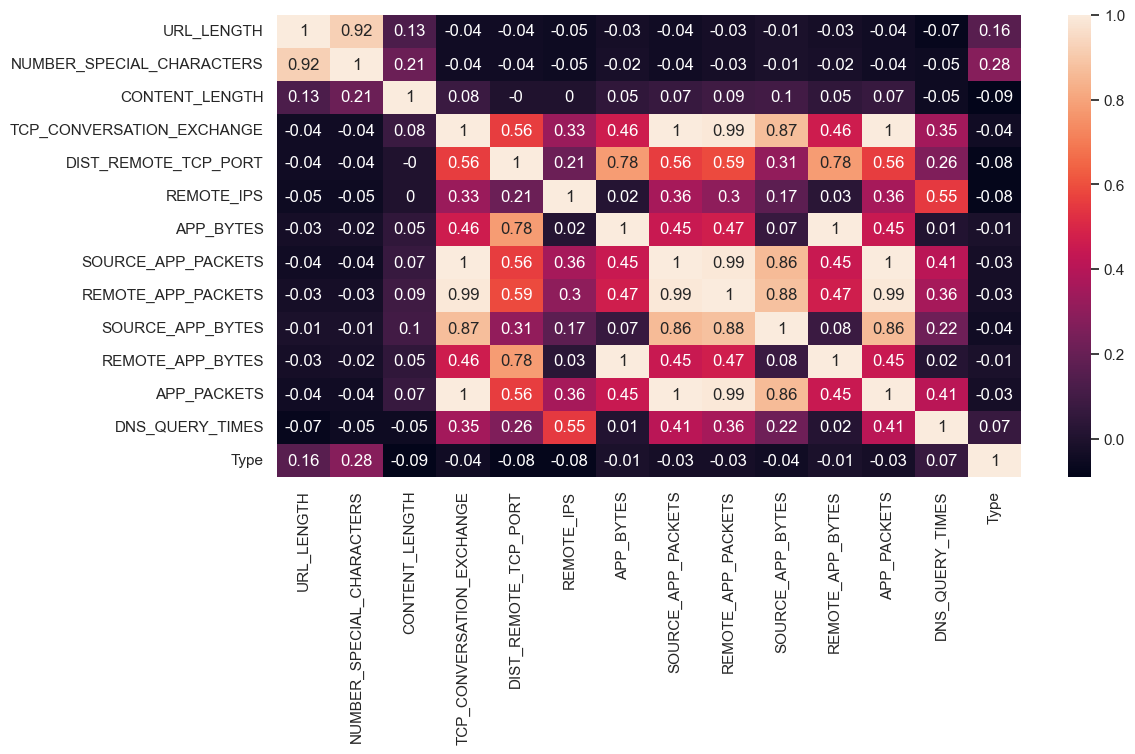

In [154]:
# Create a heatmap to visualize the correlation matrix

import seaborn as sns
sns.set_context("poster") # Set the Seaborn context to "poster" for larger text and figures
sns.set(rc={"figure.figsize": (12., 6.)}) # Set the default figure size for Seaborn plots
sns.set_style("whitegrid") # Set the Seaborn style to "whitegrid" for a white background with gridlines

sns.heatmap(corr.round(2), annot=True)

In [155]:
# Las características:
#   SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
#   REMOTE_APP_PACKETS: paquetes recibidos del servidor
#   APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.

# están fuertemente correlacionadas con la característia TCP_CONVERSATION_EXCHANGE (1, 0.99 y 1 respectivamente), lo cual tiene sentido porque:
#   TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [156]:
! pip install xgboost

179599.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [157]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [158]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [159]:
xgb = XGBClassifier()

In [160]:
xgb.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [161]:
sort_idx = xgb.feature_importances_.argsort()

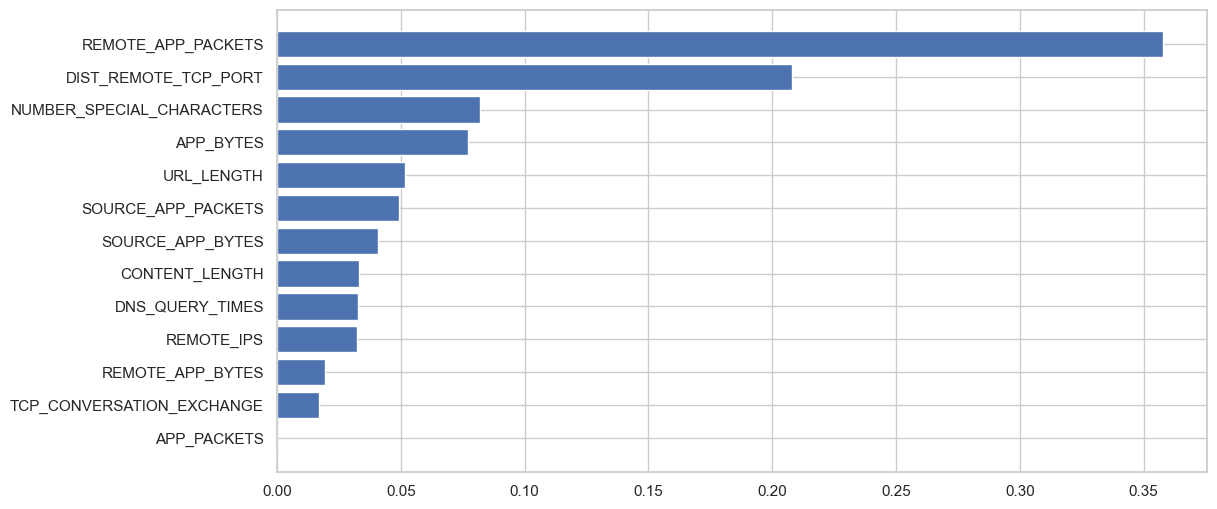

In [162]:
import matplotlib.pyplot as plt
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show()

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [163]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY

In [164]:
# Empezaremos por eliminar la característica APP_PACKETS ya que según XGBoost es la que tiene menor importancia.
websites.drop(columns=['APP_PACKETS'], inplace=True)

<Axes: >

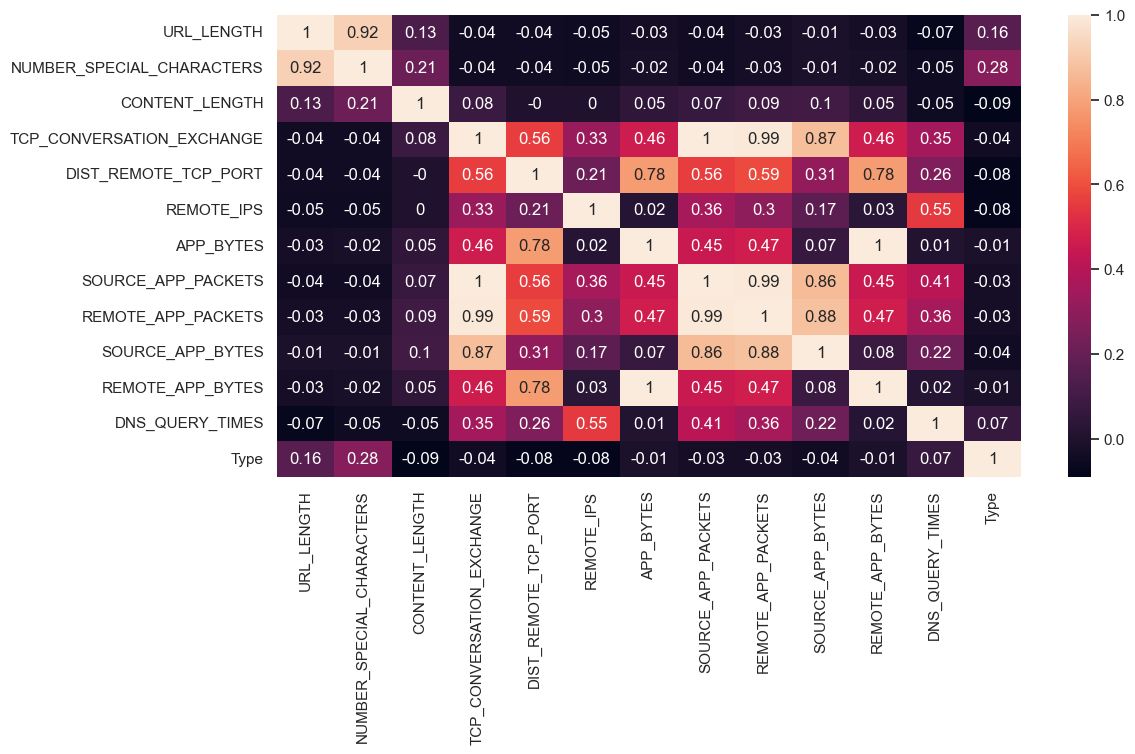

In [165]:
numericals = websites.select_dtypes(np.number)
corr = numericals.corr()
sns.heatmap(corr.round(2), annot=True)

In [166]:
# Observamos que hemos eliminado el 1 de correlación que había entre TCP_CONVERSATION_EXCHANGE y APP_PACKETS

In [167]:
# Ahora eliminamos TCP_CONVERSATION_EXCHANGE ya que según XGBoost es la siguiente de menor importancia...
websites.drop(columns=['TCP_CONVERSATION_EXCHANGE'], inplace=True)

<Axes: >

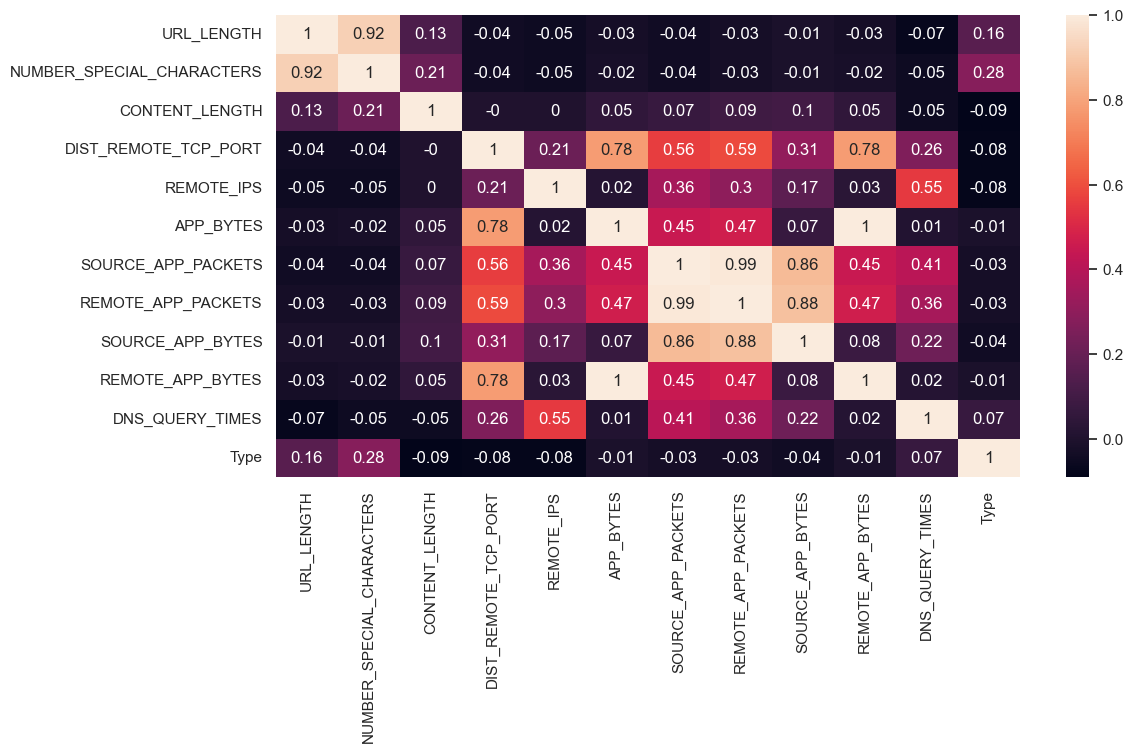

In [168]:
numericals = websites.select_dtypes(np.number)
corr = numericals.corr()
sns.heatmap(corr.round(2), annot=True)

In [169]:
# Continuamos con REMOTE_APP_BYTES...
websites.drop(columns=['REMOTE_APP_BYTES'], inplace=True)

<Axes: >

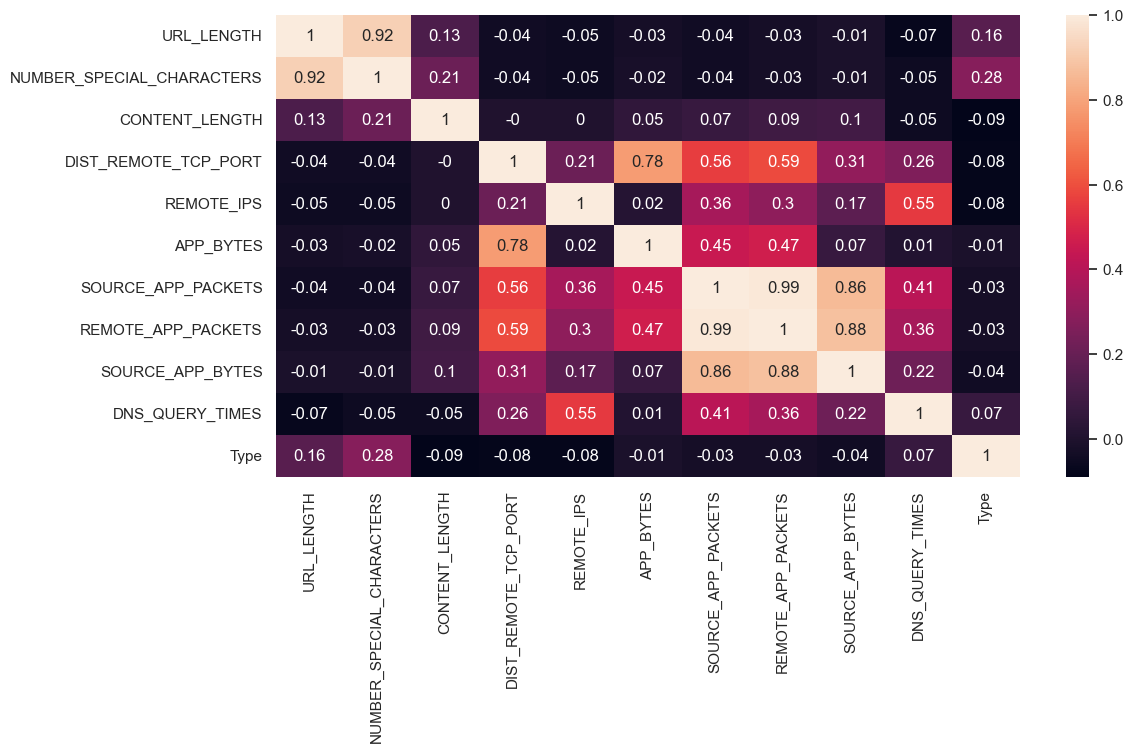

In [170]:
numericals = websites.select_dtypes(np.number)
corr = numericals.corr()
sns.heatmap(corr.round(2), annot=True)

In [171]:
# Finalmente eliminamos SOURCE_APP_PACKETS
websites.drop(columns=['SOURCE_APP_PACKETS'], inplace=True)

<Axes: >

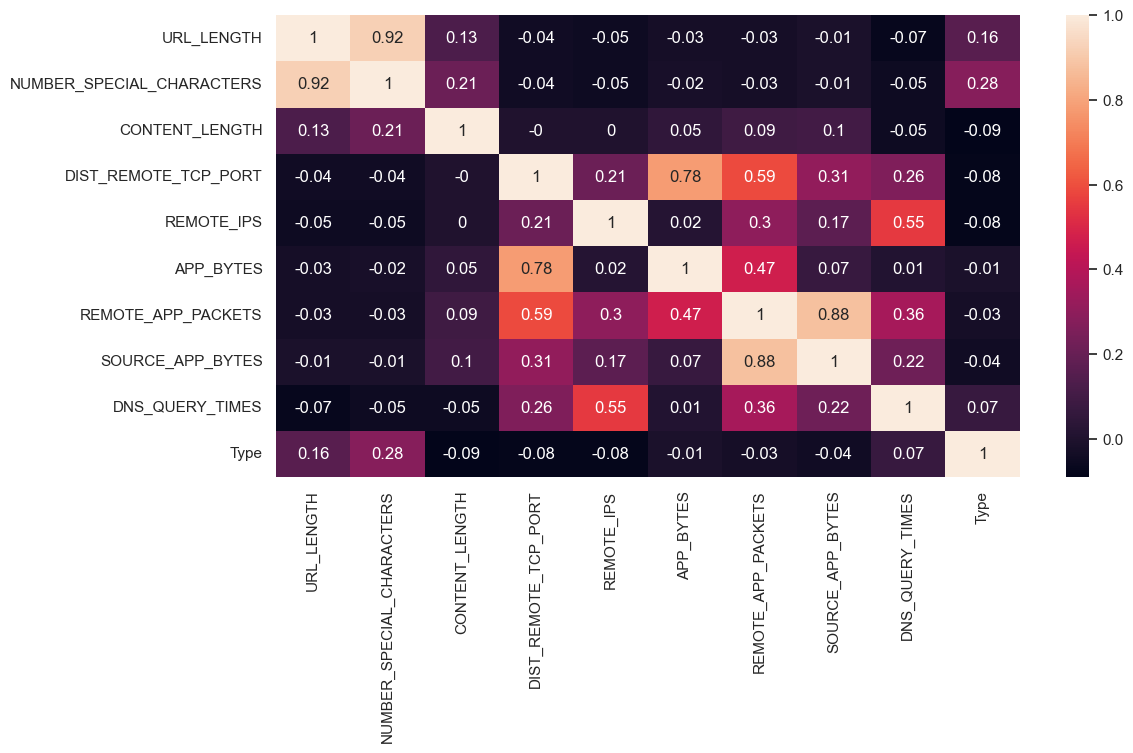

In [172]:
numericals = websites.select_dtypes(np.number)
corr = numericals.corr()
sns.heatmap(corr.round(2), annot=True)

In [173]:
# N.B. Quizá se podría hacer también un drop de URL_LENGTH, que está bastante correlacionado con NUMBER_SPECIAL_CHARACTERS... De hecho el enunciado nos dice
#  que hagamos drop de todas las correlaciones mayores del 90%. Pero de momento no hago ese drop, a ver qué pasa.

# En resumen, hemos hecho drop de:
#   APP_PACKETS
#   TCP_CONVERSATION_EXCHANGE
#   REMOTE_APP_BYTES
#   SOURCE_APP_PACKETS

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [174]:
# Check for missing values in the DataFrame
missing_values = pd.isnull(websites)
# Count missing values in each column
missing_counts = missing_values.sum()
print('Missing Values in Each Column:')
print(missing_counts)

Missing Values in Each Column:
URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [175]:
# Firts we will drop the columns with more than 50% of missing data
# Count columns with missing values
print('Percentage of missing data in columns with missing values:')
columns_with_missing = missing_counts[missing_counts > 0]
total_filas = len(websites)
for idx, value in columns_with_missing.items():
     pct = round((value / total_filas) * 100, 2)
     print(f'{idx}: {pct}% ({value} values out of {total_filas})')
# CONCLUSIÓN: Ninguna columna tiene más del 50% de nulos. Por tanto, no hacemos drop de ninguna.

Percentage of missing data in columns with missing values:
CHARSET: 0.39% (7 values out of 1781)
SERVER: 9.88% (176 values out of 1781)
CONTENT_LENGTH: 45.59% (812 values out of 1781)
WHOIS_COUNTRY: 17.18% (306 values out of 1781)
WHOIS_STATEPRO: 20.33% (362 values out of 1781)
WHOIS_REGDATE: 7.13% (127 values out of 1781)
WHOIS_UPDATED_DATE: 7.8% (139 values out of 1781)
DNS_QUERY_TIMES: 0.06% (1 values out of 1781)


In [176]:
# Now we will drop the rows with missing data
# Dropping rows with missing values (NaN). This step removes rows with any NaN values, effectively cleaning the data
websites.dropna(inplace=True, ignore_index=True)

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [177]:
# Examine missing values in each column
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        636 non-null    object 
 1   URL_LENGTH                 636 non-null    int64  
 2   NUMBER_SPECIAL_CHARACTERS  636 non-null    int64  
 3   CHARSET                    636 non-null    object 
 4   SERVER                     636 non-null    object 
 5   CONTENT_LENGTH             636 non-null    float64
 6   WHOIS_COUNTRY              636 non-null    object 
 7   WHOIS_STATEPRO             636 non-null    object 
 8   WHOIS_REGDATE              636 non-null    object 
 9   WHOIS_UPDATED_DATE         636 non-null    object 
 10  DIST_REMOTE_TCP_PORT       636 non-null    int64  
 11  REMOTE_IPS                 636 non-null    int64  
 12  APP_BYTES                  636 non-null    int64  
 13  REMOTE_APP_PACKETS         636 non-null    int64  

# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [178]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                511
CA                 41
AU                 11
PA                 10
GB                 10
JP                  6
[u'GB'; u'UK']      5
CH                  5
IN                  4
AT                  4
UA                  2
us                  2
BS                  2
SC                  2
UY                  2
CN                  2
UK                  1
PH                  1
IE                  1
AE                  1
BY                  1
BE                  1
UG                  1
NO                  1
KY                  1
TR                  1
DE                  1
IL                  1
HK                  1
SI                  1
NL                  1
RU                  1
IT                  1
Name: count, dtype: int64

In [179]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])

In [180]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'UK', 'IN', 'UG', 'JP', 'SI', 'AT',
       'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT',
       'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [181]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

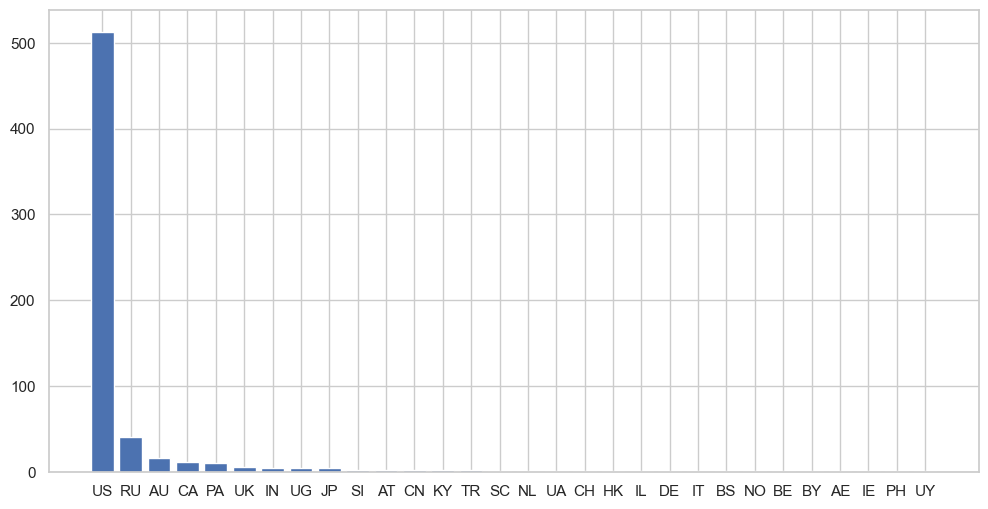

<Figure size 1500x1500 with 0 Axes>

In [182]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [ ]:
# La gráfica está mal, porque está asociando la serie unique(), que está ordenada por orden de aparición en el DataFrame,
#  con la serie value_counts(), que está ordenada por orden de frecuencia.

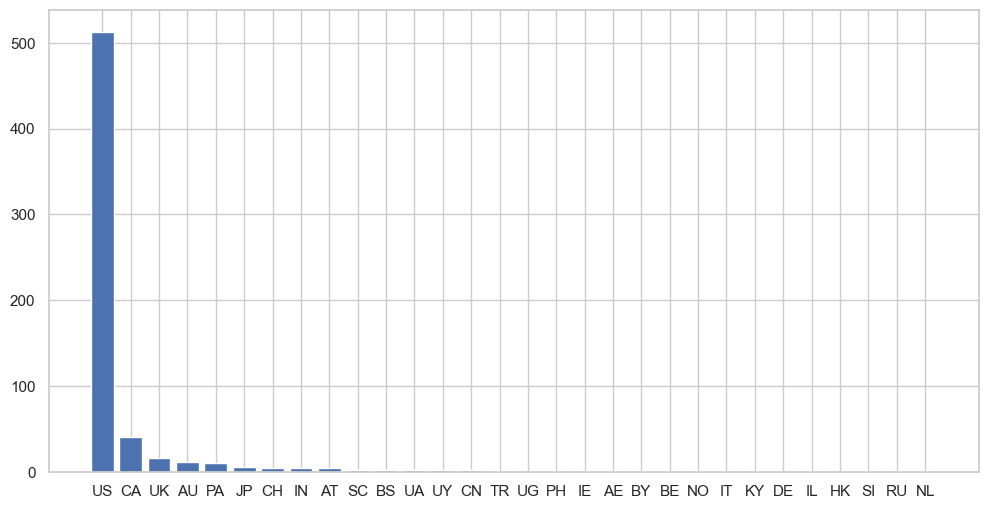

<Figure size 1500x1500 with 0 Axes>

In [184]:
# Gráfica correcta
print_bar_plot(websites.WHOIS_COUNTRY.value_counts().index, websites.WHOIS_COUNTRY.value_counts());

In [185]:

# Visto esto, nos quedaremos con los 10 primeros valores de values_counts().

In [186]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'UK', 'IN', 'UG', 'JP', 'SI', 'AT',
       'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT',
       'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

In [187]:
websites.WHOIS_COUNTRY.value_counts()[:15]

WHOIS_COUNTRY
US    513
CA     41
UK     16
AU     11
PA     10
JP      6
CH      5
IN      4
AT      4
SC      2
BS      2
UA      2
UY      2
CN      2
TR      1
Name: count, dtype: int64

In [188]:
index = websites.WHOIS_COUNTRY.value_counts().index # Los 10 primeros según value_counts(): 'US', 'CA', 'UK', 'AU', 'PA', 'JP', 'CH', 'IN', 'AT', 'SC'
index[:10]
mask = websites['WHOIS_COUNTRY'].isin(index[:10])
websites[~mask] # 24 filas fuera del Top 10
websites.loc[~mask,'WHOIS_COUNTRY'] = websites.loc[~mask,'WHOIS_COUNTRY'].apply(lambda x: 'OTHER')

In [189]:
websites[~mask].head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
4,M0_97,21,7,iso-8859-1,nginx,686.0,OTHER,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,0,2,603,9,1580,2.0,1
43,M0_74,29,7,us-ascii,Microsoft-HTTPAPI/2.0,324.0,OTHER,kireka,9/04/2002 0:00,18/04/2017 0:00,0,2,593,8,1128,2.0,1
76,B0_254,32,8,iso-8859-1,Apache,334.0,OTHER,--,19/02/2009 0:00,22/12/2015 0:00,1,4,816,13,1541,2.0,0
111,M0_16,37,9,ISO-8859-1,nginx,162.0,OTHER,beijingshi,9/02/2009 0:00,27/04/2017 0:00,0,1,66,4,404,2.0,1
155,B0_389,39,7,utf-8,Apache/2.2.15 (CentOS),431.0,OTHER,GRAND CAYMAN,24/08/2003 0:00,27/02/2017 0:00,0,1,865,12,19264,2.0,0


Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [190]:
websites.drop(columns=['WHOIS_STATEPRO','WHOIS_REGDATE','WHOIS_UPDATED_DATE'], inplace=True)

In [191]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        636 non-null    object 
 1   URL_LENGTH                 636 non-null    int64  
 2   NUMBER_SPECIAL_CHARACTERS  636 non-null    int64  
 3   CHARSET                    636 non-null    object 
 4   SERVER                     636 non-null    object 
 5   CONTENT_LENGTH             636 non-null    float64
 6   WHOIS_COUNTRY              636 non-null    object 
 7   DIST_REMOTE_TCP_PORT       636 non-null    int64  
 8   REMOTE_IPS                 636 non-null    int64  
 9   APP_BYTES                  636 non-null    int64  
 10  REMOTE_APP_PACKETS         636 non-null    int64  
 11  SOURCE_APP_BYTES           636 non-null    int64  
 12  DNS_QUERY_TIMES            636 non-null    float64
 13  Type                       636 non-null    int64  

# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [192]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [193]:
websites.drop(columns=['URL'], inplace=True)

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [194]:
websites.CHARSET.unique()

array(['ISO-8859-1', 'iso-8859-1', 'us-ascii', 'utf-8', 'UTF-8',
       'windows-1251'], dtype=object)

`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [195]:
websites.SERVER.unique()

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0',
       'Apache/2.4.7 (Ubuntu)', 'Apache',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22', 'Microsoft-IIS/7.5', 'nginx/1.12.0',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.4.25 (Amazon) PHP/7.0.14',
       'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3', 'ATS',
       'CherryPy/3.6.0', 'Apache/2.2.15 (CentOS)',
       'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40',
       'Apache/2.2.3 (CentOS)', 'Apache/2.4', 'Apache/2.4.10 (Debian)',
       'Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [ ]:
websites.SERVER.value_counts()

SERVER
Apache                    162
Microsoft-HTTPAPI/2.0      76
nginx                      59
GSE                        46
Microsoft-IIS/7.5          39
                         ... 
barista/5.1.3               1
mw2225.codfw.wmnet          1
openresty/1.11.2.2          1
Apache/2.2.23 (Amazon)      1
Apache/2.2.16 (Debian)      1
Name: count, Length: 120, dtype: int64

In [197]:
def server_name(x):
    if "apache" in x.lower():
        return "Apache"
    elif "microsoft" in x.lower():
        return "Microsoft"
    elif "nginx" in x.lower():
        return "nginx"
    else:
        return "Other"
    
websites.loc[:,'SERVER'] = websites.loc[:,'SERVER'].transform(server_name)

In [198]:
websites.SERVER.value_counts()

SERVER
Apache       298
Microsoft    127
Other        108
nginx        103
Name: count, dtype: int64

OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [202]:
websites.dtypes # CHARSET, SERVER, WHOIS_COUNTRY

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [203]:
websites.CHARSET.value_counts()

CHARSET
UTF-8           200
ISO-8859-1      169
utf-8           108
us-ascii         92
iso-8859-1       66
windows-1251      1
Name: count, dtype: int64

In [ ]:
websites.loc[:,'CHARSET'] = websites.loc[:,'CHARSET'].transform(lambda x: x.upper())
websites.CHARSET.value_counts()
# Quizá deberíamos hacer un drop de la única fila con WINDOWS-1251 ¿?

CHARSET
UTF-8           308
ISO-8859-1      235
US-ASCII         92
WINDOWS-1251      1
Name: count, dtype: int64

In [221]:
charset_dummies = pd.get_dummies(websites.CHARSET, dtype="int", drop_first=True)
charset_dummies

,US-ASCII,UTF-8,WINDOWS-1251
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,0,0
...,...,...,...
631,0,0,0
632,0,1,0
633,0,0,0
634,0,1,0


In [222]:
websites.CHARSET.unique()

array(['ISO-8859-1', 'US-ASCII', 'UTF-8', 'WINDOWS-1251'], dtype=object)

In [223]:
# En el caso de SERVER, añadimos prefix para que no se confundan los dummies Other de SERVER y los dummies OTHER de WHOIS_COUNTRY
server_dummies = pd.get_dummies(websites.SERVER, dtype="int", drop_first=True, prefix='SERVER', prefix_sep='_')
server_dummies

,SERVER_Microsoft,SERVER_Other,SERVER_nginx
0,0,0,1
1,0,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
631,0,1,0
632,0,0,1
633,1,0,0
634,0,0,0


In [224]:
websites.SERVER.unique()

array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

In [225]:
country_dummies = pd.get_dummies(websites.WHOIS_COUNTRY, dtype="int", drop_first=True, prefix='PAIS', prefix_sep='_')
country_dummies

,PAIS_AU,PAIS_CA,PAIS_CH,PAIS_IN,PAIS_JP,PAIS_OTHER,PAIS_PA,PAIS_SC,PAIS_UK,PAIS_US
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
631,0,0,0,0,0,0,0,0,0,1
632,0,0,0,0,0,0,0,0,0,1
633,0,0,0,0,0,0,0,0,0,1
634,0,0,0,0,0,0,0,0,0,1


In [226]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'OTHER', 'AU', 'CA', 'PA', 'UK', 'IN', 'JP', 'AT', 'SC',
       'CH'], dtype=object)

In [227]:
website_dummy = pd.concat([websites, charset_dummies, server_dummies, country_dummies], axis=1)
website_dummy.drop(columns=['CHARSET','SERVER','WHOIS_COUNTRY'], inplace=True)
website_dummy

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,...,PAIS_AU,PAIS_CA,PAIS_CH,PAIS_IN,PAIS_JP,PAIS_OTHER,PAIS_PA,PAIS_SC,PAIS_UK,PAIS_US
0,17,6,162.0,22,3,3812,37,18784,8.0,0,...,0,0,0,0,0,0,0,0,0,1
1,18,6,345.0,0,3,1189,13,8559,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,19,6,324.0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,20,6,324.0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,21,7,686.0,0,2,603,9,1580,2.0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,143,22,374.0,5,2,564,7,442,0.0,0,...,0,0,0,0,0,0,0,0,0,1
632,146,24,11833.0,20,8,4167,33,3181,4.0,0,...,0,0,0,0,0,0,0,0,0,1
633,183,29,4890.0,2,7,2062,26,8161,8.0,0,...,0,0,0,0,0,0,0,0,0,1
634,201,34,8904.0,2,6,6631,89,132181,4.0,0,...,0,0,0,0,0,0,0,0,0,1


Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [228]:
website_dummy.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CONTENT_LENGTH               float64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
US-ASCII                       int64
UTF-8                          int64
WINDOWS-1251                   int64
SERVER_Microsoft               int64
SERVER_Other                   int64
SERVER_nginx                   int64
PAIS_AU                        int64
PAIS_CA                        int64
PAIS_CH                        int64
PAIS_IN                        int64
PAIS_JP                        int64
PAIS_OTHER                     int64
PAIS_PA                        int64
PAIS_SC                        int64
PAIS_UK                        int64
PAIS_US                        int64
dtype: object

In [236]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 636 non-null    int64  
 1   NUMBER_SPECIAL_CHARACTERS  636 non-null    int64  
 2   CONTENT_LENGTH             636 non-null    float64
 3   DIST_REMOTE_TCP_PORT       636 non-null    int64  
 4   REMOTE_IPS                 636 non-null    int64  
 5   APP_BYTES                  636 non-null    int64  
 6   REMOTE_APP_PACKETS         636 non-null    int64  
 7   SOURCE_APP_BYTES           636 non-null    int64  
 8   DNS_QUERY_TIMES            636 non-null    float64
 9   Type                       636 non-null    int64  
 10  US-ASCII                   636 non-null    int64  
 11  UTF-8                      636 non-null    int64  
 12  WINDOWS-1251               636 non-null    int64  
 13  SERVER_Microsoft           636 non-null    int64  

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [229]:
from sklearn.model_selection import train_test_split

# Separar las variables predictoras (X) y la variable de respuesta (y)
X = website_dummy.drop(columns=['Type'])  # Variables predictoras
y = website_dummy['Type']  # Variable de respuesta

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X,y, test_size=0.2, random_state=42)

#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [267]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [268]:
from sklearn.preprocessing import StandardScaler 
transformer = StandardScaler().fit(X_entrenamiento) 
X_entrenamiento_scaled = transformer.transform(X_entrenamiento) 
logreg.fit(X_entrenamiento_scaled, y_entrenamiento)

LogisticRegression()

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

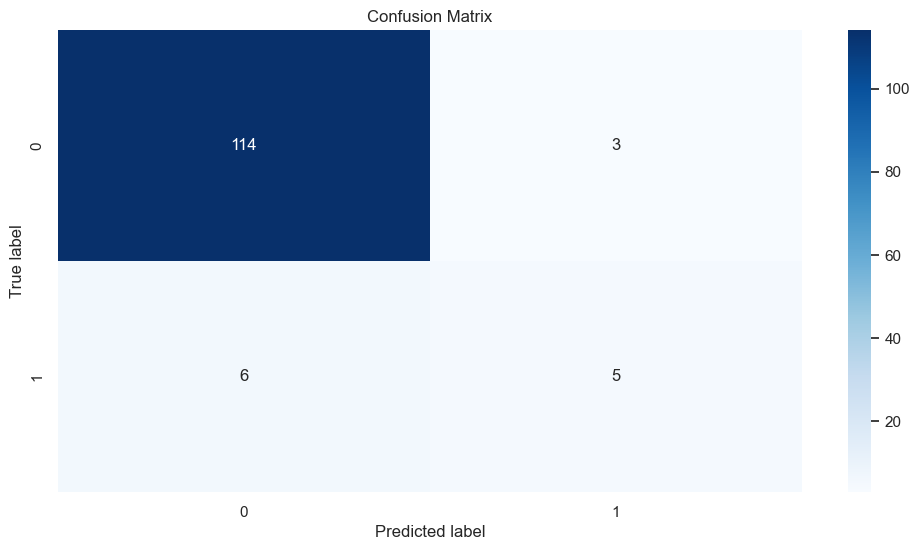

Accuracy score:  0.9296875


In [269]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X_prueba_scaled = transformer.transform(X_prueba)
y_prueba_pred = logreg.predict(X_prueba_scaled)

#Obtener la matriz de confusión
cm = confusion_matrix(y_prueba, y_prueba_pred)

#Crear un mapa de calor para visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#Agregar etiquetas y títulos
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

#Mostrar la matriz de confusión
plt.show()

# Accuracy score
score = accuracy_score(y_prueba,y_prueba_pred)
print('Accuracy score: ', score)


In [270]:
# Exactitud = aciertos/total
exactitud = 119/128           
print('Exactitud: ', exactitud, '\n')

# Precisión = TP / (TP + FP)
precision_malicious = 5 / (5+3)     
print('Precisión para clase malicious: ', precision_malicious)
# Exhaustividad = TP / (TP + FN)
exhaustividad_malicious = 5 / (5+6) 
print('Exhaustividad para clase malicious: ', exhaustividad_malicious, '\n')

# Precisión = TP / (TP + FP)
precision_benign = 114 / (114+6)     
print('Precisión para clase benign: ', precision_benign)
# Exhaustividad = TP / (TP + FN)
exhaustividad_benign = 114 / (114+3) 
print('Exhaustividad para clase benign: ', exhaustividad_benign)

Exactitud:  0.9296875 

Precisión para clase malicious:  0.625
Exhaustividad para clase malicious:  0.45454545454545453 

Precisión para clase benign:  0.95
Exhaustividad para clase benign:  0.9743589743589743


¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

### Conclusiones:


In [271]:
# En general el modelo predice bastante bien (exactitud 92% es bastante alta).
# Sin embargo, predice bastante mejor las webs benignas (Type==0) que las malignas (Type==1).
# Es posible que sea debido a que los datos no están balanceados ¿? (i.e. más muestras benignas --590-- que malignas --46--)
# También podríamos volver a probar haciendo drop de la columna NUMER_SPECIAL_CHARACTERS (tenía correlación ligeramente > 90%), a ver qué pasa...

#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [279]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_entrenamiento_scaled, y_entrenamiento)

DecisionTreeClassifier(max_depth=3)

Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

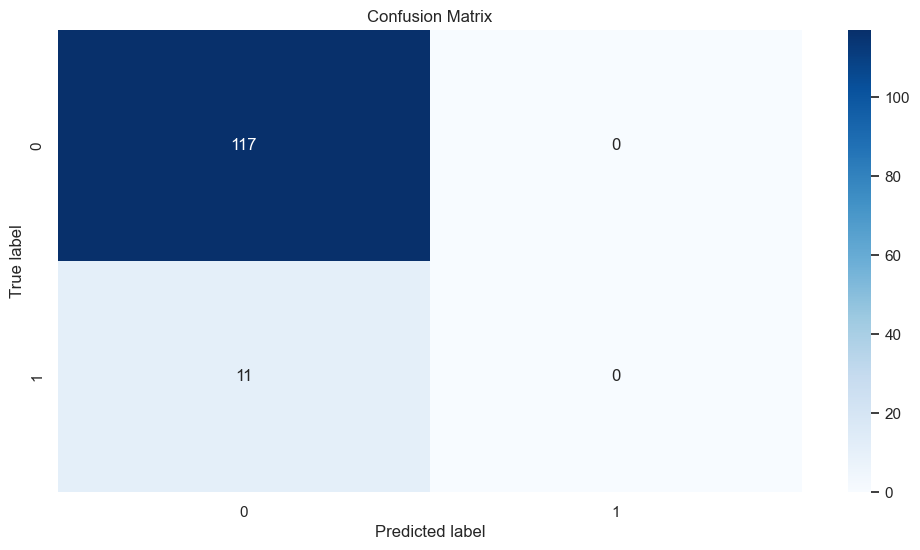

Accuracy score:  0.9140625


In [280]:
# Método A) El de siempre
# y_prueba_pred = dtc.predict(X_prueba_scaled)

# Método B) Obtener predicción a partir de probabilidad + umbral
# Calcular las probabilidades predichas
# The returned estimates for all classes are ordered by the label of classes.
# print(dtc.classes_)
y_prob = clf.predict_proba(X_prueba_scaled)[:, 1]  # Probabilidad de la clase positiva (1)

# Decidir 0 o 1 utilizando un umbral de 0,5
y_prueba_pred = (y_prob >= 0.5).astype(int)

#Obtener la matriz de confusión
cm = confusion_matrix(y_prueba, y_prueba_pred)

#Crear un mapa de calor para visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#Agregar etiquetas y títulos
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

#Mostrar la matriz de confusión
plt.show()

# Accuracy score
score = accuracy_score(y_prueba, y_prueba_pred)
print('Accuracy score: ', score)

#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [285]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_entrenamiento_scaled, y_entrenamiento)

DecisionTreeClassifier(max_depth=5)

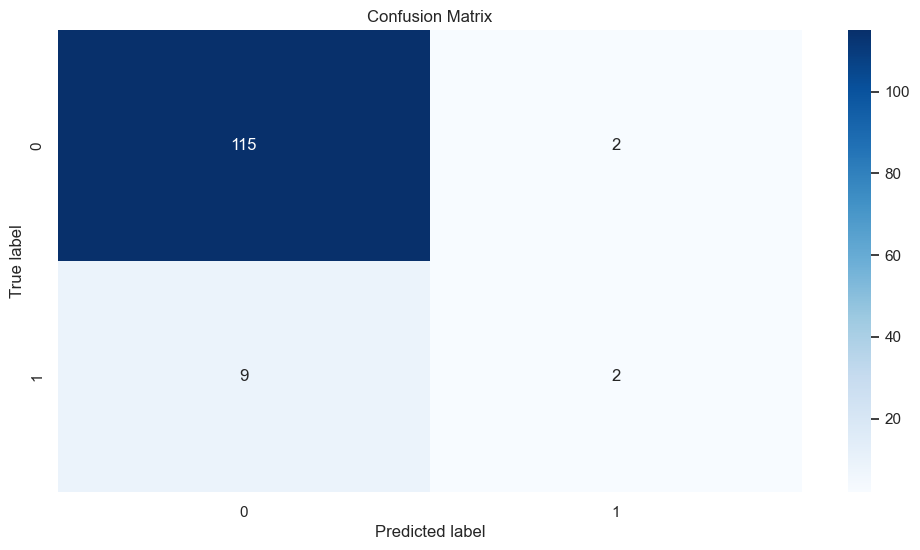

Accuracy score:  0.9140625


In [286]:
y_prob = clf.predict_proba(X_prueba_scaled)[:, 1]  # Probabilidad de la clase positiva (1)

# Decidir 0 o 1 utilizando un umbral de 0,5
y_prueba_pred = (y_prob >= 0.5).astype(int)

#Obtener la matriz de confusión
cm = confusion_matrix(y_prueba, y_prueba_pred)

#Crear un mapa de calor para visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#Agregar etiquetas y títulos
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

#Mostrar la matriz de confusión
plt.show()

# Accuracy score
score = accuracy_score(y_prueba, y_prueba_pred)
print('Accuracy score: ', score)

¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión:

In [ ]:
# La puntuación de precisión es la misma. Sin embargo, con max_depth=5 el modelo de clasificación es capaz de predecir correctamente algunos websites maliciosos,
#  reduciendo el número de falsos negativos de 11 a 9. Aunque a costa de generar algunos (2) falsos positivos de websites benignos (i.e. websites benignos que son clasificados como maliciosos).
# De hecho, aumentando aún más ese parámetro (e.g. max_depth=7) vemos que mejora sustancialmente la predicción correcta de websites maliciosos. Dependiendo de cuál sea
#  nuestro propósito para la clasificación (e.g. bloqueo automático de websites maliciosos) podría interesarnos ese objetivo para nuestro modelo.

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [ ]:
# Your code here

## Conclusiones:

Add your comments here: